# Section 5d: Job Size Analysis

In [14]:
import psutil
from pyspark.sql.types import IntegerType
import pyspark.sql.functions as F
from util.read_and_print_df import *
from util.handle_nan import *
from util.extract_json_attributes import *
from util.plotting import *
import matplotlib.pyplot as plt
import builtins
import pandas as pd
import seaborn as sns
from datetime import date, datetime, time, timedelta
from matplotlib.pyplot import MultipleLocator
import matplotlib 

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'libertine'

In [15]:
spark = get_spark_session()

Assigning 541 GB of memory per spark driver and executor, and use 126 cores.


In [16]:
df_slurm = spark.read.parquet(path_job_dataset)
df_slurm = get_gpu_node_col(df_slurm, 'node')
df_slurm = df_slurm.withColumnRenamed('gpu_node', 'is_ml')
df_slurm = df_slurm.withColumn('numnodes', F.col('numnodes').cast(IntegerType()))
df_slurm_pd = df_slurm.select('numnodes','state','is_ml').toPandas()

# select generic and ml jobs
df_slurm_generic = df_slurm_pd[df_slurm_pd['is_ml'] == 0]
df_slurm_generic_completed = df_slurm_generic[df_slurm_generic['state'] == 'COMPLETED']
df_slurm_generic_failed = df_slurm_generic[df_slurm_generic['state'] == 'FAILED']

df_slurm_ml = df_slurm_pd[df_slurm_pd['is_ml'] == 1]
df_slurm_ml_completed = df_slurm_ml[df_slurm_ml['state'] == 'COMPLETED']
df_slurm_ml_failed = df_slurm_ml[df_slurm_ml['state'] == 'FAILED']

In [17]:
df_slurm_ml['numnodes'].describe()

count    190475.000000
mean          1.005203
std           0.099450
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: numnodes, dtype: float64

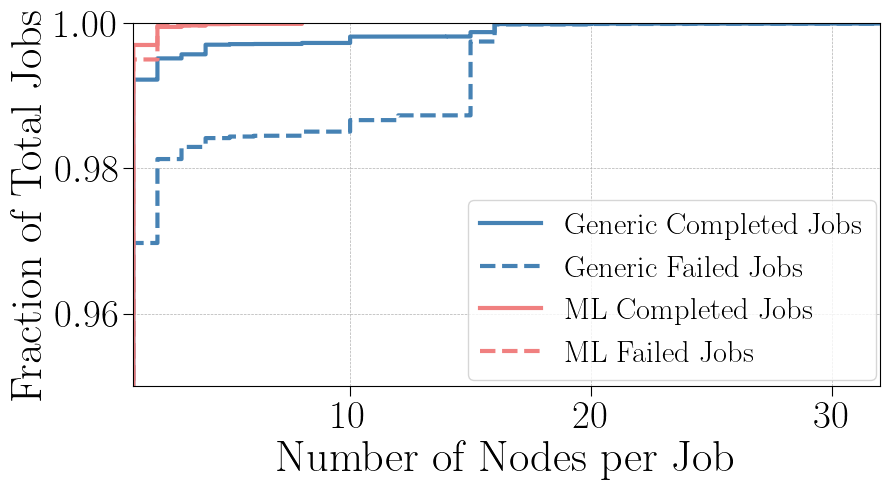

In [18]:
# draw a cdf plot for gereric and ml jobs, completed and failed
fig, ax = plt.subplots()
# fig size (9,6)
fig.set_size_inches(9, 5)
sns.ecdfplot(data=df_slurm_generic_completed['numnodes'], ax=ax, color='steelblue', linestyle = 'solid', label = 'Generic Completed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_generic_failed['numnodes'], ax=ax, color='steelblue', linestyle = 'dashed', label = 'Generic Failed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_ml_completed['numnodes'], ax=ax, color='lightcoral', linestyle = 'solid', label = 'ML Completed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_ml_failed['numnodes'], ax=ax, color='lightcoral', linestyle = 'dashed', label = 'ML Failed Jobs', linewidth=3)

# set grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim([1, 32])
# set x scale 
ax.set_xscale('linear')


ax.set_ylim([0.95, 1])
plt.tick_params(axis='both', which='major', labelsize=28, length=7)
plt.legend(loc='lower right', fontsize=22, bbox_to_anchor=(1.015, -0.025))
plt.xlabel('Number of Nodes per Job', fontsize=32)
plt.ylabel('Fraction of Total Jobs', fontsize=32)
# plt.title('CDF of Number of Cores for Different States and Job Types')
plt.tight_layout()
plt.show()


In [19]:
df_slurm = spark.read.parquet(path_job_dataset)
df_slurm = get_gpu_node_col(df_slurm, 'node')
df_slurm = df_slurm.withColumnRenamed('gpu_node', 'is_ml')
# set the number of cores to be integer
df_slurm = df_slurm.withColumn('numcores', F.col('numcores').cast(IntegerType()))
df_slurm_pd = df_slurm.select('numcores','state','is_ml').toPandas()


# select generic and ml jobs
df_slurm_generic = df_slurm_pd[df_slurm_pd['is_ml'] == 0]
df_slurm_generic_completed = df_slurm_generic[df_slurm_generic['state'] == 'COMPLETED']
df_slurm_generic_failed = df_slurm_generic[df_slurm_generic['state'] == 'FAILED']

df_slurm_ml = df_slurm_pd[df_slurm_pd['is_ml'] == 1]
df_slurm_ml_completed = df_slurm_ml[df_slurm_ml['state'] == 'COMPLETED']
df_slurm_ml_failed = df_slurm_ml[df_slurm_ml['state'] == 'FAILED']

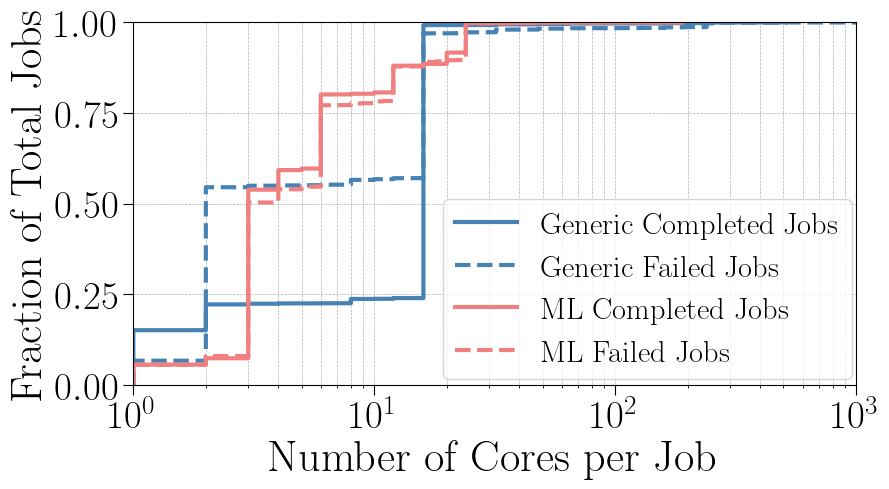

In [20]:
# draw a cdf plot for gereric and ml jobs, completed and failed
fig, ax = plt.subplots()
# fig size (9,6)
fig.set_size_inches(9, 5)
sns.ecdfplot(data=df_slurm_generic_completed['numcores'], ax=ax, color='steelblue', linestyle = 'solid', label = 'Generic Completed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_generic_failed['numcores'], ax=ax, color='steelblue', linestyle = 'dashed', label = 'Generic Failed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_ml_completed['numcores'], ax=ax, color='lightcoral', linestyle = 'solid', label = 'ML Completed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_ml_failed['numcores'], ax=ax, color='lightcoral', linestyle = 'dashed', label = 'ML Failed Jobs', linewidth=3)

# set grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xscale('log')
ax.set_xlim([1, 10**3])
plt.tick_params(axis='both', which='major', labelsize=28, length=7)
plt.legend(loc='lower right', fontsize=22, bbox_to_anchor=(1.015, -0.025))
plt.xlabel('Number of Cores per Job', fontsize=32)
plt.ylabel('Fraction of Total Jobs', fontsize=32)
# plt.title('CDF of Number of Cores for Different States and Job Types')
plt.tight_layout()
plt.savefig('plots/section_5/fig-cdf_cores.pdf', bbox_inches = 'tight')
plt.show()

In [21]:
df = pd.read_parquet(path_job_dataset)

mark_ml_df(df)

generic_df = df.loc[df["is_ml"] == 0]
ml_df = df.loc[df["is_ml"] == 1]
df

,id,start_date,end_date,node,nodetypes,numnodes,numcores,submit_date,state,split_nodes,is_ml
0,1,2021-12-26 23:06:31,2021-12-31 23:06:50,r13n5,normal(1),1,16,2021-12-26 17:11:18,TIMEOUT,{r13n5},0
1,2,2021-12-26 23:06:43,2021-12-31 23:06:50,r14n27,normal(1),1,16,2021-12-26 17:11:18,TIMEOUT,{r14n27},0
2,3,2021-12-26 23:06:43,2021-12-31 23:06:50,r15n12,normal(1),1,16,2021-12-26 17:11:18,TIMEOUT,{r15n12},0
3,4,2021-12-26 23:06:43,2021-12-31 23:06:50,r10n14,normal(1),1,16,2021-12-26 17:11:18,TIMEOUT,{r10n14},0
4,5,2021-12-26 23:06:43,2021-12-31 23:06:50,r10n30,normal(1),1,16,2021-12-26 17:11:18,TIMEOUT,{r10n30},0
...,...,...,...,...,...,...,...,...,...,...,...
1596958,2323557,2022-11-01 13:58:19,2022-11-01 13:59:01,r14n20,normal(1),1,16,2022-11-01 13:54:21,COMPLETED,{r14n20},0
1596959,2323558,2022-11-01 13:58:19,2022-11-01 13:59:18,r14n21,normal(1),1,16,2022-11-01 13:54:26,COMPLETED,{r14n21},0
1596960,2323559,2022-11-01 13:55:57,2022-11-01 13:58:54,r28n1,gpu_titanrtx_shared(1),1,6,2022-11-01 13:55:57,CANCELLED,{r28n1},1
1596961,2323560,2022-11-01 13:56:17,2022-11-01 13:56:24,r13n10,shared(1),1,6,2022-11-01 13:56:12,FAILED,{r13n10},0


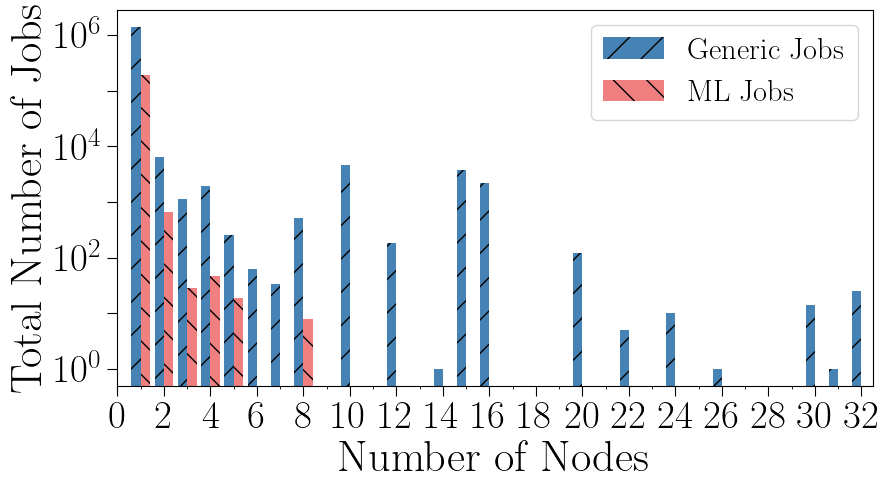

In [22]:
# Number of nodes used by per job.

group_generic_df = generic_df.groupby('numnodes').count().reset_index()
group_generic_df["numnodes"] = group_generic_df["numnodes"].astype("int")
group_generic_df = group_generic_df.sort_values(by=['numnodes'],ascending=True)

group_ml_df = ml_df.groupby('numnodes').count().reset_index()
group_ml_df["numnodes"] = group_ml_df["numnodes"].astype("int")
group_ml_df = group_ml_df.sort_values(by=['numnodes'],ascending=True)

#fig = plt.figure(figsize=(9, 3))
fig, ax = plt.subplots(figsize = (9, 5))

ge = plt.bar(group_generic_df['numnodes'] - 0.2, group_generic_df['id'], width=0.4, color="steelblue", hatch="/", label = "Generic Jobs")
ml = plt.bar(group_ml_df['numnodes'] + 0.2, group_ml_df['id'], width=0.4, color="lightcoral", hatch="\\", label ="ML Jobs")

plt.legend(loc = "upper right", fontsize=22)
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# set x limits
plt.xlim([0, 32.5])
plt.yscale("log")
plt.tick_params(axis='both', which='major', labelsize=28, length=7)
plt.xlabel("Number of Nodes", fontsize=32)
plt.ylabel("Total Number of Jobs", fontsize=32)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_yticks([10**(x) for x in range(0, 7, 1)])
for label in ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

# pad top of the figure


plt.tight_layout()
fig.savefig('plots/section_5/fig-bar_nodes.pdf', bbox_inches = 'tight')
plt.show()

In [23]:
# fig: node hours pdf

df_slurm = spark.read.parquet(path_job_dataset)
df_slurm = get_gpu_node_col(df_slurm, 'node')
df_slurm = df_slurm.withColumnRenamed('gpu_node', 'is_ml')

df_slurm = df_slurm.withColumn('numnodes', F.col('numnodes').cast(IntegerType()))
df_slurm_pd = df_slurm.toPandas()

df_slurm_pd["job_run_time"] = df_slurm_pd["end_date"] - df_slurm_pd["start_date"]
df_slurm_pd["job_run_time"] = df_slurm_pd["job_run_time"].apply(lambda x:timedelta.total_seconds(x))
df_slurm_pd["job_run_time"] = df_slurm_pd["job_run_time"]/60/60 # hour
df_slurm_pd.loc[df_slurm_pd['job_run_time'] < 0, 'job_run_time'] += 1 # due to time change

# select 'numnodes','state','is_ml','job_run_time'
df_slurm_pd = df_slurm_pd[['numnodes','state','is_ml','job_run_time']]
# create a new column 'node_hours' for df_slurm_pd by multiplying 'numnodes' and 'job_run_time'
df_slurm_pd['node_hours'] = df_slurm_pd['numnodes'] * df_slurm_pd['job_run_time']
df_slurm_pd


,numnodes,state,is_ml,job_run_time,node_hours
0,1,TIMEOUT,0,120.005278,120.005278
1,1,TIMEOUT,0,120.001944,120.001944
2,1,TIMEOUT,0,120.001944,120.001944
3,1,TIMEOUT,0,120.001944,120.001944
4,1,TIMEOUT,0,120.001944,120.001944
...,...,...,...,...,...
1596958,1,COMPLETED,0,0.011667,0.011667
1596959,1,COMPLETED,0,0.016389,0.016389
1596960,1,CANCELLED,1,0.049167,0.049167
1596961,1,FAILED,0,0.001944,0.001944


In [24]:
# select generic and ml jobs
df_slurm_generic = df_slurm_pd[df_slurm_pd['is_ml'] == 0]
df_slurm_generic_completed = df_slurm_generic[df_slurm_generic['state'] == 'COMPLETED']
df_slurm_generic_failed = df_slurm_generic[df_slurm_generic['state'] == 'FAILED']

df_slurm_ml = df_slurm_pd[df_slurm_pd['is_ml'] == 1]
df_slurm_ml_completed = df_slurm_ml[df_slurm_ml['state'] == 'COMPLETED']
df_slurm_ml_failed = df_slurm_ml[df_slurm_ml['state'] == 'FAILED']

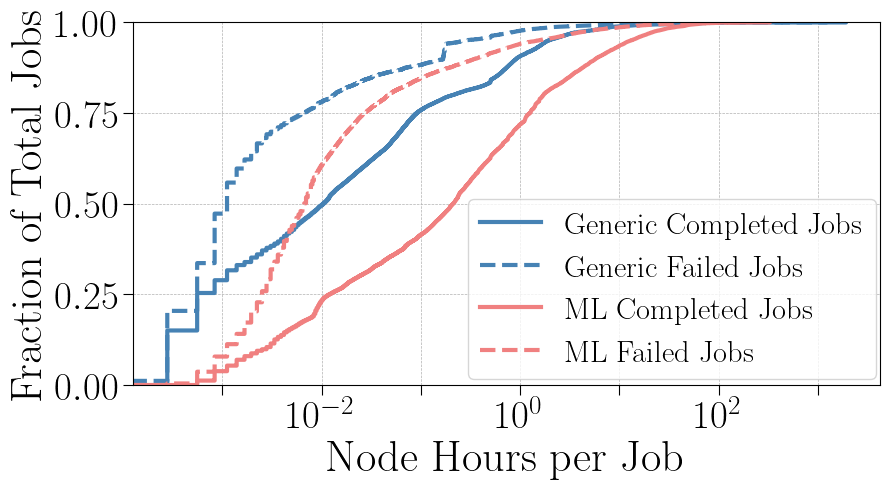

In [25]:
# fig: node hours cdf
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
sns.ecdfplot(data=df_slurm_generic_completed['node_hours'], ax=ax, color='steelblue', linestyle = 'solid', label = 'Generic Completed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_generic_failed['node_hours'], ax=ax, color='steelblue', linestyle = 'dashed', label = 'Generic Failed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_ml_completed['node_hours'], ax=ax, color='lightcoral', linestyle = 'solid', label = 'ML Completed Jobs', linewidth=3)
sns.ecdfplot(data=df_slurm_ml_failed['node_hours'], ax=ax, color='lightcoral', linestyle = 'dashed', label = 'ML Failed Jobs', linewidth=3)

# set grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xscale('log')
# ax.set_xlim([0, 20])
# ax.set_xscale('log')
ax.set_xticks([10**(x) for x in range(-3, 4)])
plt.tick_params(axis='both', which='major', labelsize=28, length=7)
plt.legend(loc='lower right', fontsize=22, bbox_to_anchor=(1.015, -0.025))
plt.xlabel('Node Hours per Job', fontsize=32)
plt.ylabel('Fraction of Total Jobs', fontsize=32)
# plt.title('CDF of Node Hours for Different States and Job Types')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.tight_layout()
plt.savefig('plots/section_5/fig-cdf_node_hours.pdf', bbox_inches = 'tight')
plt.show()